In [1]:
import numpy as np # linear algebra
import scipy as scipy
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc
import dill

import keras as k
import cv2
from tqdm import tqdm


Using Theano backend.


In [2]:
def getCov(a):
    red_lst = list()
    green_lst = list()
    blue_lst = list()
    nir_lst = list()
    for image in a:
        red_lst.append(np.cov(image[:,:,0]))
        green_lst.append(np.cov(image[:,:,1]))
        blue_lst.append(np.cov(image[:,:,2]))
        nir_lst.append(np.cov(image[:,:,3]))
    return np.array(red_lst), np.array(green_lst), np.array(blue_lst), np.array(nir_lst)

In [3]:
def estimated_autocorrelation(x):
    """
    http://stackoverflow.com/q/14297012/190597
    http://en.wikipedia.org/wiki/Autocorrelation#Estimation
    """
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    result = r/(variance*(np.arange(n, 0, -1)))
    return result

In [4]:
from skimage import measure
def getEntropy(a):
    red_lst = list()
    green_lst = list()
    blue_lst = list()
    nir_lst = list()
    for i, image in enumerate(a):
        red_lst.append(measure.shannon_entropy(image[:,:,0]))
        green_lst.append(measure.shannon_entropy(image[:,:,1]))
        blue_lst.append(measure.shannon_entropy(image[:,:,2]))
        nir_lst.append(measure.shannon_entropy(image[:,:,3]))
    return np.array(red_lst), np.array(green_lst), np.array(blue_lst), np.array(nir_lst)

In [ ]:
from skimage import feature

def getEdges(a):
    red_lst = list()
    green_lst = list()
    blue_lst = list()
    nir_lst = list()
    for i, image in enumerate(a):
        if i % 10000 == 0:
            print(i)
        red_lst.append(feature.canny(image[:,:,0], sigma=3))
        green_lst.append(feature.canny(image[:,:,1], sigma=3))
        blue_lst.append(feature.canny(image[:,:,2], sigma=3))
        nir_lst.append(feature.canny(image[:,:,3], sigma=3))
    temp = np.array([red_lst, green_lst, blue_lst, nir_lst])
    return temp.reshape((temp.shape[1], temp.shape[2], temp.shape[3], temp.shape[0]))


In [5]:
def getAuto(a):
    a = a.reshape((a.shape[0], a.shape[1] * a.shape[2], a.shape[3]))
    red_lst = list()
    green_lst = list()
    blue_lst = list()
    nir_lst = list()
    for i, image in enumerate(a):
        if i % 1000 == 0:
            print(i)
        red_lst.append(estimated_autocorrelation(image[:,0]))
        green_lst.append(estimated_autocorrelation(image[:,1]))
        blue_lst.append(estimated_autocorrelation(image[:,2]))
        nir_lst.append(estimated_autocorrelation(image[:,3]))
    return np.array(red_lst), np.array(green_lst), np.array(blue_lst), np.array(nir_lst)

In [8]:
train_red_mean = np.mean(x_train[:,:,:,0].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), axis=1)
train_green_mean = np.mean(x_train[:,:,:,1].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), axis=1)
train_blue_mean = np.mean(x_train[:,:,:,2].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), axis=1)
train_nir_mean = np.mean(x_train[:,:,:,3].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), axis=1)

train_red_std = np.std(x_train[:,:,:,0].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), axis=1)
train_green_std = np.std(x_train[:,:,:,1].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), axis=1)
train_blue_std = np.std(x_train[:,:,:,2].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), axis=1)
train_nir_std = np.std(x_train[:,:,:,3].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), axis=1)

train_red_var = np.var(x_train[:,:,:,0].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), axis=1)
train_green_var = np.var(x_train[:,:,:,1].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), axis=1)
train_blue_var = np.var(x_train[:,:,:,2].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), axis=1)
train_nir_var = np.var(x_train[:,:,:,3].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), axis=1)

train_red_moment = scipy.stats.moment(x_train[:,:,:,0].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), 
                                axis=1, moment=2)
train_green_moment = scipy.stats.moment(x_train[:,:,:,1].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), 
                                  axis=1, moment=2)
train_blue_moment = scipy.stats.moment(x_train[:,:,:,2].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), 
                                 axis=1, moment=2)
train_nir_moment = scipy.stats.moment(x_train[:,:,:,3].reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2]), 
                                axis=1, moment=2)

train_red_dct = scipy.fftpack.dct(x_train[:,:,:,0].astype(np.float64), axis=0)
train_green_dct = scipy.fftpack.dct(x_train[:,:,:,1].astype(np.float64), axis=0)
train_blue_dct = scipy.fftpack.dct(x_train[:,:,:,2].astype(np.float64), axis=0)
train_nir_dct = scipy.fftpack.dct(x_train[:,:,:,3].astype(np.float64), axis=0)

train_red_cov, train_green_cov, train_blue_cov, train_nir_cov = getCov(x_train)

train_red_ent, train_green_ent, train_blue_ent, train_nir_ent = getEntropy(x_train)

train_red_auto, train_green_auto, train_blue_auto, train_nir_auto = getAuto(x_train)

train_red_auto = train_red_auto.reshape((train_red_auto.shape[0], 32, 32))
train_blue_auto = train_blue_auto.reshape((train_blue_auto.shape[0], 32, 32))
train_green_auto = train_blue_auto.reshape((train_green_auto.shape[0], 32, 32))
train_nir_auto = train_nir_auto.reshape((train_nir_auto.shape[0], 32, 32))


train_means = np.array([train_red_mean, train_green_mean, train_blue_mean, train_nir_mean])
train_means = train_means.reshape((train_means.shape[1], train_means.shape[0]))
print(train_means.shape)

train_std = np.array([train_red_std, train_green_std, train_blue_std, train_nir_std])
train_std = train_std.reshape((train_std.shape[1], train_std.shape[0]))

train_var = np.array([train_red_var, train_green_var, train_blue_var, train_nir_var])
train_var = train_var.reshape((train_var.shape[1], train_var.shape[0]))

train_moment = np.array([train_red_moment, train_green_moment, train_blue_moment, train_nir_moment])
train_moment = train_moment.reshape((train_moment.shape[1], train_moment.shape[0]))

train_ent = np.array([train_red_ent, train_green_ent, train_blue_ent, train_nir_ent])
train_ent = train_ent.reshape((train_ent.shape[1], train_ent.shape[0]))

train_dct = np.array([train_red_dct, train_green_dct, train_blue_dct, train_nir_dct])
train_dct = train_dct.reshape((train_dct.shape[1], train_dct.shape[2], 
                               train_dct.shape[3], train_dct.shape[0]))
print(train_dct.shape)

train_cov = np.array([train_red_cov, train_green_cov, train_blue_cov, train_nir_cov])
train_cov = train_cov.reshape((train_cov.shape[1], train_cov.shape[2], 
                               train_cov.shape[3], train_cov.shape[0]))

train_auto = np.array([train_red_auto, train_green_auto, train_blue_auto, train_nir_auto])
train_auto = train_auto.reshape((train_auto.shape[1], train_auto.shape[2], 
                               train_auto.shape[3], train_auto.shape[0]))


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
(35000, 4)
(35000, 32, 32, 4)


In [9]:
test_red_mean = np.mean(x_test[:,:,:,0].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), axis=1)
test_green_mean = np.mean(x_test[:,:,:,1].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), axis=1)
test_blue_mean = np.mean(x_test[:,:,:,2].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), axis=1)
test_nir_mean = np.mean(x_test[:,:,:,3].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), axis=1)

test_red_std = np.std(x_test[:,:,:,0].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), axis=1)
test_green_std = np.std(x_test[:,:,:,1].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), axis=1)
test_blue_std = np.std(x_test[:,:,:,2].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), axis=1)
test_nir_std = np.std(x_test[:,:,:,3].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), axis=1)

test_red_var = np.var(x_test[:,:,:,0].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), axis=1)
test_green_var = np.var(x_test[:,:,:,1].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), axis=1)
test_blue_var = np.var(x_test[:,:,:,2].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), axis=1)
test_nir_var = np.var(x_test[:,:,:,3].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), axis=1)

test_red_moment = scipy.stats.moment(x_test[:,:,:,0].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), 
                                axis=1, moment=2)
test_green_moment = scipy.stats.moment(x_test[:,:,:,1].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), 
                                  axis=1, moment=2)
test_blue_moment = scipy.stats.moment(x_test[:,:,:,2].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), 
                                 axis=1, moment=2)
test_nir_moment = scipy.stats.moment(x_test[:,:,:,3].reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2]), 
                                axis=1, moment=2)

test_red_dct = scipy.fftpack.dct(x_test[:,:,:,0].astype(np.float64), axis=0)
test_green_dct = scipy.fftpack.dct(x_test[:,:,:,1].astype(np.float64), axis=0)
test_blue_dct = scipy.fftpack.dct(x_test[:,:,:,2].astype(np.float64), axis=0)
test_nir_dct = scipy.fftpack.dct(x_test[:,:,:,3].astype(np.float64), axis=0)

test_red_cov, test_green_cov, test_blue_cov, test_nir_cov = getCov(x_test)

test_red_ent, test_green_ent, test_blue_ent, test_nir_ent = getEntropy(x_test)

test_red_auto, test_green_auto, test_blue_auto, test_nir_auto = getAuto(x_test)

test_red_auto = test_red_auto.reshape((test_red_auto.shape[0], 32, 32))
test_blue_auto = test_blue_auto.reshape((test_blue_auto.shape[0], 32, 32))
test_green_auto = test_blue_auto.reshape((test_green_auto.shape[0], 32, 32))
test_nir_auto = test_nir_auto.reshape((test_nir_auto.shape[0], 32, 32))


test_means = np.array([test_red_mean, test_green_mean, test_blue_mean, test_nir_mean])
test_means = test_means.reshape((test_means.shape[1], test_means.shape[0]))
print(test_means.shape)

test_std = np.array([test_red_std, test_green_std, test_blue_std, test_nir_std])
test_std = test_std.reshape((test_std.shape[1], test_std.shape[0]))

test_var = np.array([test_red_var, test_green_var, test_blue_var, test_nir_var])
test_var = test_var.reshape((test_var.shape[1], test_var.shape[0]))

test_moment = np.array([test_red_moment, test_green_moment, test_blue_moment, test_nir_moment])
test_moment = test_moment.reshape((test_moment.shape[1], test_moment.shape[0]))

test_ent = np.array([test_red_ent, test_green_ent, test_blue_ent, test_nir_ent])
test_ent = test_ent.reshape((test_ent.shape[1], test_ent.shape[0]))

test_dct = np.array([test_red_dct, test_green_dct, test_blue_dct, test_nir_dct])
test_dct = test_dct.reshape((test_dct.shape[1], test_dct.shape[2], 
                               test_dct.shape[3], test_dct.shape[0]))
print(test_dct.shape)

test_cov = np.array([test_red_cov, test_green_cov, test_blue_cov, test_nir_cov])
test_cov = test_cov.reshape((test_cov.shape[1], test_cov.shape[2], 
                               test_cov.shape[3], test_cov.shape[0]))

test_auto = np.array([test_red_auto, test_green_auto, test_blue_auto, test_nir_auto])
test_auto = test_auto.reshape((test_auto.shape[1], test_auto.shape[2], 
                               test_auto.shape[3], test_auto.shape[0]))


0
1000
2000
3000
4000
5000
(5479, 4)
(5479, 32, 32, 4)


I should really save these so I dont have to rerun it every time...

[[-0.69712817 -0.40731947 -0.68764175 -0.6732679 ]
 [-0.19834292 -0.49660415 -0.58600371 -0.70497144]
 [-0.50696221  0.10065853 -0.468822   -0.68333886]
 ..., 
 [ 0.93774598  0.55756677  1.36349532  0.21687387]
 [ 0.12920095  0.32415964  0.0403174   1.98330029]
 [ 0.30278871 -0.35956653  0.31265756  0.4666212 ]]


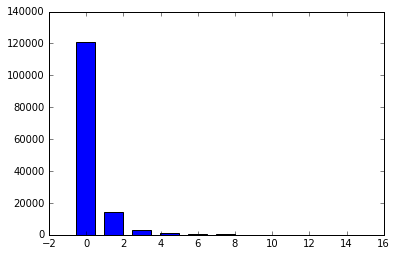

In [13]:
copy_train_std = np.copy(train_std)
copy_train_std -= np.mean(train_std, axis = 0) # zero-center
copy_train_std /= np.std(train_std, axis = 0) # normalize
print(copy_train_std)

import matplotlib.pyplot as plt

hist, bins = np.histogram(copy_train_std, bins=10)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()


In [14]:
saving = [train_means, train_std, train_var, train_moment, train_ent, train_dct, train_cov, train_auto,
         test_means, test_std, test_var, test_moment, test_ent, test_dct, test_cov, test_auto]
with open('basicFeatures2.pkl', 'wb') as out_strm: 
    dill.dump(saving, out_strm)

shit, this is a 3gb file...

In [12]:
import gc
gc.collect()

133